In [166]:
import csv

bldgs = [
    b for b in
    csv.reader(open("data/found.csv"))
]

In [167]:
for row in bldgs[1:]:
    try:
        row[14] = int(row[14])
    except ValueError:
        row[14] = 0
    try:
        row[15] = int(row[15])
    except ValueError:
        row[15] = 0
    try:
        row[5] = int(row[5])
    except ValueError:
        row[5] = 0
    if "инд" in row[8].lower():
        row[8] = "индивидуальный"
    if "515" in row[8].lower():
        row[8] = "1-515"
    if "510" in row[8].lower():
        row[8] = "1-510"
    if "511" in row[8].lower():
        row[8] = "1-511"

In [168]:
import pandas

bldgs = pandas.DataFrame(bldgs[1:], columns=bldgs[0])

In [169]:
bldgs.head()

,ADDR,LAT,LON,HOUSE_ID,ADDRESS,YEAR,LASTUPDATE,SERVICEDATE_START,SERIE,HOUSE_TYPE,...,AREA_NONLIVE,AREA_GEN,AREA_LAND,AREA_PARK,CADNO,ENERGY_CLASS,BLAG_PLAYGROUND,BLAG_SPORT,BLAG_OTHER,OTHER
0,"город Зеленоград, улица Гоголя, дом 11А",55.987543,37.171487,7720237,"г. Москва, г. Зеленоград, ул. Гоголя, д. 11А",1967,28.01.2016 в 08:39,01.03.2015,447/С 12-а/6,Многоквартирный дом,...,975.00,4610.00,2492.00,Незаполнено,,C,Имеется,Не имеется,Не заполнено,Не заполнено
1,"город Зеленоград, улица Гоголя, дом 11Б",55.987004,37.171199,7721720,"г. Москва, г. Зеленоград, ул. Гоголя, д. 11Б",1969,27.01.2016 в 14:36,01.03.2015,1-447/С12-а/61,Многоквартирный дом,...,668.00,3340.00,1876.00,Незаполнено,,C,Имеется,Не имеется,Не заполнено,Не заполнено
2,"город Зеленоград, улица Гоголя, дом 11В",55.986224,37.171774,7721725,"г. Москва, г. Зеленоград, ул. Гоголя, д. 11В",1970,28.01.2016 в 08:37,01.03.2015,1-447/С 12-а/61,Многоквартирный дом,...,653.00,3204.00,1726.00,Незаполнено,,C,Имеется,Имеется,Не заполнено,Не заполнено
3,"город Зеленоград, корпус 925",55.983424,37.181836,7742561,"г. Москва, г. Зеленоград, д. 925",1967,18.02.2016 в 18:13,01.01.2012,1-515,Многоквартирный дом,...,0.00,1265.80,Незаполнено,259.00,,C,Имеется,Не имеется,Не заполнено,Не заполнено
4,"город Зеленоград, корпус 926",55.983393,37.182617,7742563,"г. Москва, г. Зеленоград, д. 926",1967,18.02.2016 в 18:23,01.01.2012,1-515,Многоквартирный дом,...,0.00,907.60,Незаполнено,273.00,,D,Не имеется,Не имеется,Не заполнено,Не заполнено


In [170]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (14,8)

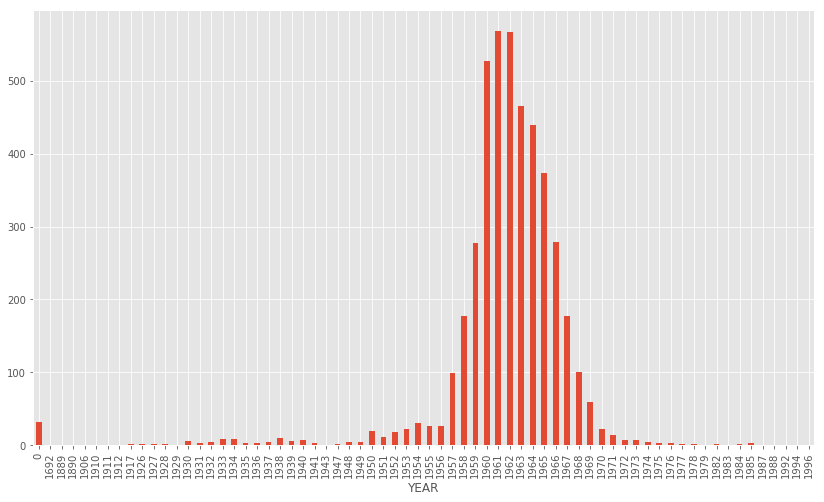

In [171]:
bldgs.groupby("YEAR").ADDR.nunique().plot.bar()

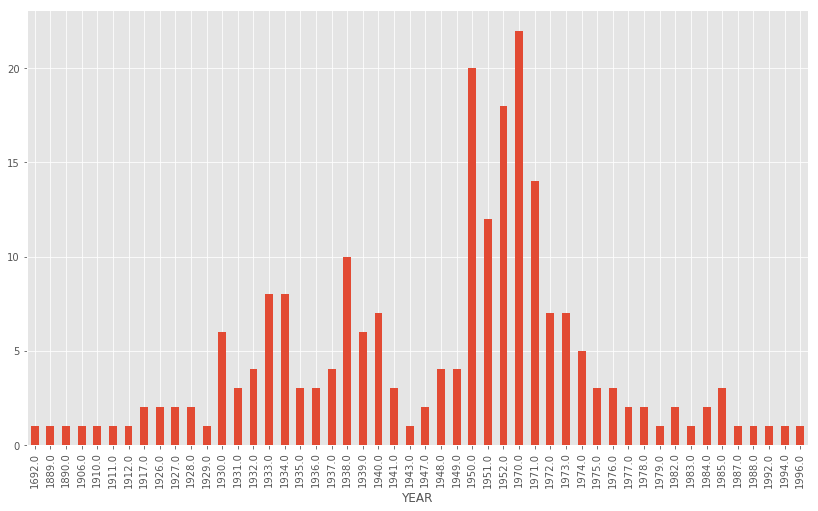

In [172]:
bldgs.where(
    (bldgs["YEAR"] != 0) & ((bldgs["YEAR"]>1969) | (bldgs["YEAR"]<1953))
).groupby("YEAR").ADDR.nunique().plot.bar()

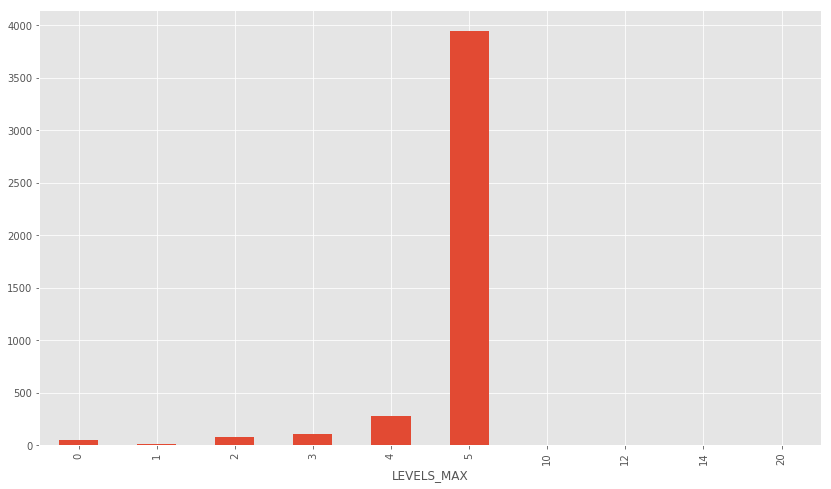

In [176]:
bldgs.groupby("LEVELS_MAX").ADDR.nunique().plot.bar()

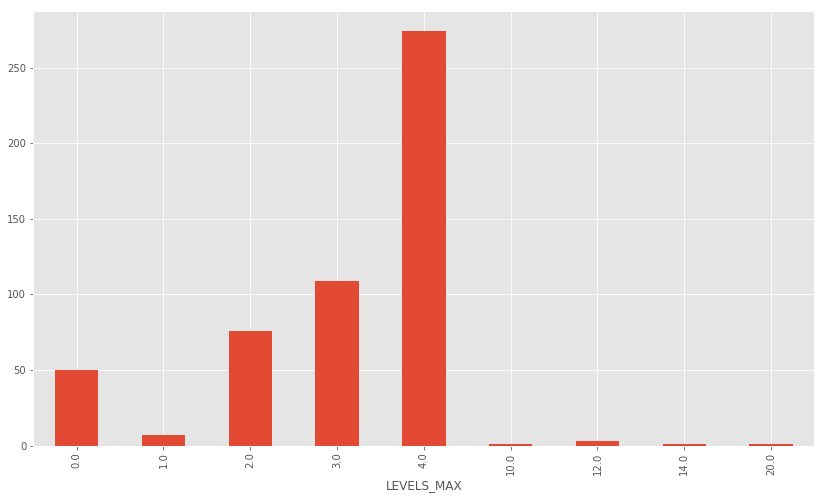

In [174]:
bldgs.where(bldgs["LEVELS_MAX"]!=5).groupby("LEVELS_MAX").ADDR.nunique().plot.bar()

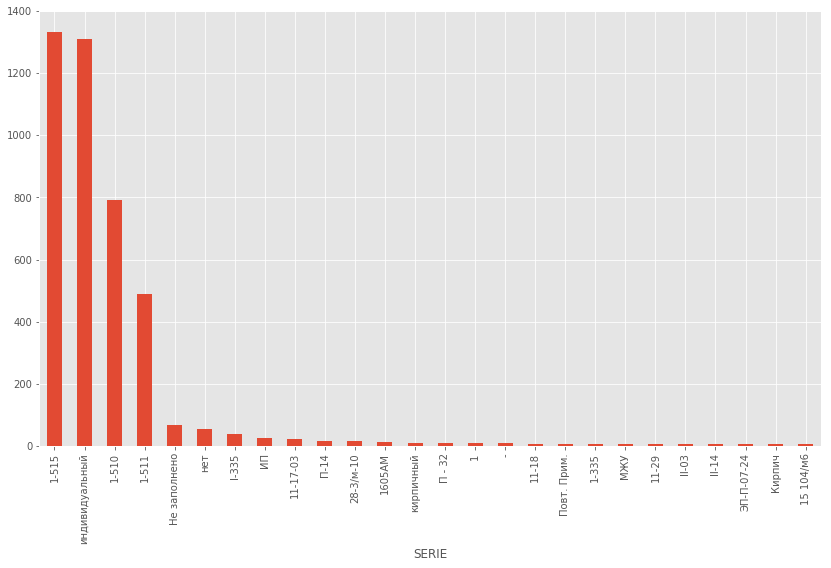

In [175]:
bb = bldgs.groupby("SERIE")["ADDR"].size()
bb[bb>5].sort_values(ascending=False).plot.bar()